<a href="https://colab.research.google.com/github/CarlosContrerasVilla/IA-y-RN/blob/main/1RED_NEURONAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de la clase Inteligencia Artificial y Redes Neuronales**

Este  proyecto consiste en el entrenamiento de una red neuronal artificial.
Se genero un conjunto de datos (imagenes) que son numeros del 0-9.


**Carlos Hiram Contreras Villarreal 1965687 **

In [1]:
#importar librerias
import os
import cv2
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras

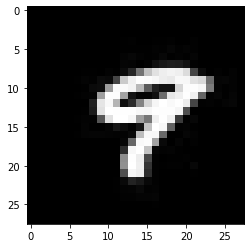

In [47]:
#imagenes de entrenamiento
i=0
f=0
image_array=[]
image_label=[]

while(i<80):
  file = '/content/'+str(i)+'.png'

  test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE )

  
  img_resized= cv2.resize(test_image,(28,28),)

  img_resized=cv2.bitwise_not(img_resized)

  #Preview de la imagen reformateada
  numeros='/content/'+str(i)+'.png'
  plt.imshow(img_resized,cmap='gray')
  if(f==9):
    image_array.append(img_resized)#aqui se guarda la imagen convertida
    image_label.append(f)#etiqueta del 0-9
    
    f=0
  else:
    
    image_array.append(img_resized)#aqui se guarda la imagen convertida
    image_label.append(f)#etiqueta del 0-9
    f=f+1

  i=i+1


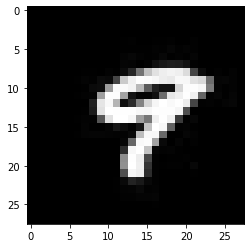

In [48]:
#iamgenes para test van ser 20 imagenes
i=80
f=0
image_test=[]
label_test=[]

while(i<100):
  file = '/content/'+str(i)+'.png'

  test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE )

  
  img_resized= cv2.resize(test_image,(28,28),)

  img_resized=cv2.bitwise_not(img_resized)

  #Preview de la imagen reformateada
  numeros='/content/'+str(i)+'.png'
  plt.imshow(img_resized,cmap='gray')
  if(f==9):
    image_test.append(img_resized)#aqui se guarda la imagen convertida
    label_test.append(f)#etiqueta del 0-9
    
    f=0
  else:
    
    image_test.append(img_resized)#aqui se guarda la imagen convertida
    label_test.append(f)#etiqueta del 0-9
    f=f+1

  i=i+1

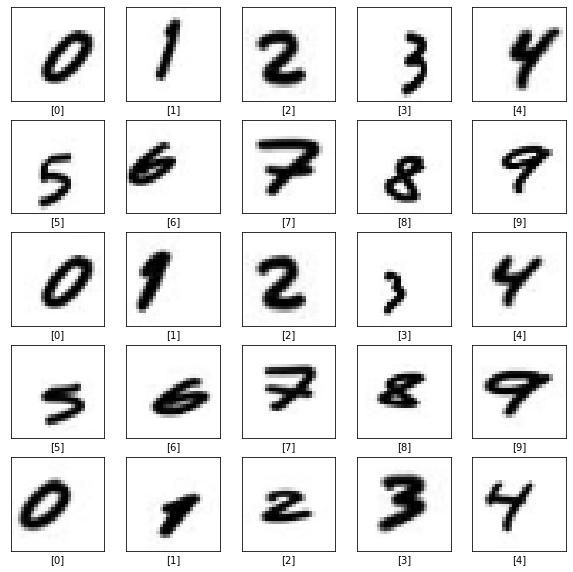

In [8]:
i=0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_array[i],cmap=plt.cm.binary)
    plt.xlabel([image_label[i]])
plt.show()

In [9]:
train_images= np.array(image_array) 


In [10]:
train_labels=np.array(image_label) 

In [14]:
test_images=np.array(image_test) 

In [15]:
test_labels=np.array(label_test) 

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 6ms/step - loss: 102.4134 - accuracy: 0.2000
Epoch 2/10
4/4 [==============================] - 0s 6ms/step - loss: 23.2099 - accuracy: 0.7000
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 9.3869 - accuracy: 0.7800
Epoch 4/10
4/4 [==============================] - 0s 6ms/step - loss: 4.9463 - accuracy: 0.9100
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 1.4199 - accuracy: 0.9600
Epoch 6/10
4/4 [==============================] - 0s 7ms/step - loss: 0.6613 - accuracy: 0.9700
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0196 - accuracy: 0.9900
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0364 - accuracy: 0.9900
Epoch 9/10
4/4 [==============================] - 0s 8ms/step - loss: 7.6412e-07 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 1.0000


## Evaluar Exactitud



In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - 167ms/epoch - 167ms/step

Test accuracy: 1.0


## Hacer predicciones


In [21]:
predictions = model.predict(test_images)

1/1 [==============================] - 0s 84ms/step


In [22]:
predictions[0]

array([9.9999994e-01, 0.0000000e+00, 1.6997879e-35, 9.0743114e-31,
       9.3539681e-32, 0.0000000e+00, 0.0000000e+00, 5.2599207e-34,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [23]:
np.argmax(predictions[0])

0

In [24]:
test_labels[0]

0

In [25]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [38]:
class_names= ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

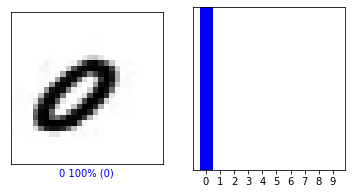

In [39]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

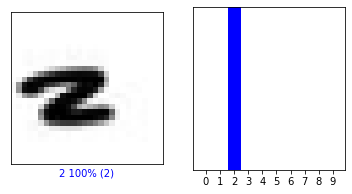

In [40]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

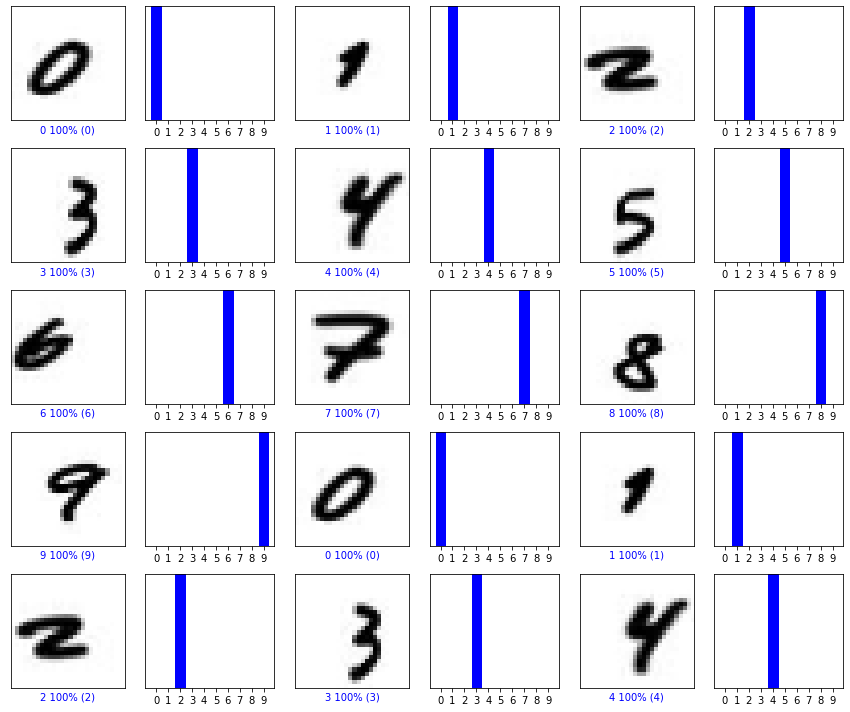

In [41]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [42]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [43]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [44]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 38ms/step
[[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0121719e-26 2.6270806e-16
  0.0000000e+00 0.0000000e+00 0.0000000e+00 6.4050089e-19 0.0000000e+00]]


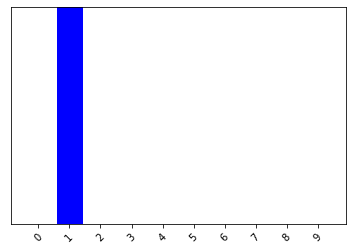

In [45]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [46]:
np.argmax(predictions_single[0])

1